##  Human Activity Recognition Data Analysis Using Samsung Galaxy S II Smartphone

Descriptive multivariate data analysis is conducted in R using "Human Activity Recognition Using Smartphones Dataset Version 1.0" from the UC Irvine Machine Learning Repository that includes triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration, triaxial Angular velocity from the gyroscope, 561 variables with time and frequency domain data, activity labels, and identifiers of the subject who carried out the experiment.

Eight data files from are gathered, merged, munged, and organized to create one data set. The mean is calculated for each "features" variable that contained the mean or standard deviation for that variable. A barplot visualization shows the mean for the subject's activity for each "features" variable.

The "Human Activity Recognition Using Smartphones Dataset Version 1.0" and represents six activities subject's carried out during experiments using the Samsung Galaxy S II smartphone. A complete explanation can be found at the website: http://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones

Set file path to save download to.
Set the URL for the download location.
Download the file and save it to the user's working directory.

In [27]:
path <- file.path(paste(getwd(), 'getdata_projectfiles_UCI HAR Dataset.zip', sep = "/"))


In [28]:
url <- "https://d396qusza40orc.cloudfront.net/getdata%2Fprojectfiles%2FUCI%20HAR%20Dataset.zip"


In [29]:
download.file(url, path)

Unzip file and put it in user's current working directory

In [30]:
chooseFile<-file.choose()
workingDir<-getwd()
unzip(chooseFile,exdir = workingDir)


There are multiple files we need to work with inside the download folder so let's set the working directory to inside of unzipped folder.

In [31]:
setwd(paste(getwd(), 'UCI HAR Dataset', sep = "/"))


Now we import various files from our download into R. Files imported include:
 - "features" file as a vector
 - "y_test" file as a vector
 - "y_train" file as a vector
 - "subject_test" file as a vector
 - "subject_train" file as vector
 - "X_test" file as a data table
 - "X_train" file as a data table

In [32]:
features_labels <- scan("./features.txt", what = "text", sep = "\t")


In [33]:
test_activities <- scan("./test/y_test.txt", what = "numeric", sep = "\t")
test_activities <- as.numeric(test_activities)


In [34]:
train_activities <- scan("./train/y_train.txt", what = "numeric", sep = "\t")
train_activities <- as.numeric(train_activities)


In [35]:
test_subjects <- scan("./test/subject_test.txt", what = "numeric", sep = "\t")
test_subjects <- as.numeric(test_subjects)


In [36]:
train_subjects <- scan("./train/subject_train.txt", what = "numeric", sep = "\t")
train_subjects <- as.numeric(train_subjects)


In [37]:
test_features <- read.table("./test/X_test.txt", header = FALSE, col.names = features_labels, na.strings = c(" ", "NA"), stringsAsFactors = FALSE, strip.white = TRUE, colClasses = "numeric")


In [38]:
train_features <- read.table("./train/X_train.txt", header = FALSE, col.names = features_labels, na.strings = c(" ", "NA"), stringsAsFactors = FALSE, strip.white = TRUE, colClasses = "numeric")


We create a vector to use as labels for factors to denote activities. 

In [39]:
factors_labels <- c("WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING")


Let's convert test_activities and test_subjects from numeric values to more human readable factors using our factors labels.
We bind test_activities to "factors" and "features" vectors. We do the same conversion for train_activities and train_subjects and binding for the train_activities "factors" and "features" vectors.

In [40]:
test_bind_final <- cbind(factor(test_subjects, labels = c("Subject 2", "Subject 4", "Subject 9", "Subject 10", "Subject 12", "Subject 13", "Subject 18", "Subject 20", "Subject 24")), 
    cbind(factor(test_activities, labels = factors_labels), test_features))


In [41]:
train_bind_final <- cbind(factor(train_subjects, labels = c("Subject 1", "Subject 3", "Subject 5", "Subject 6", "Subject 7", "Subject 8", "Subject 11", "Subject 14", "Subject 15", "Subject 16", "Subject 17", "Subject 19", "Subject 21", "Subject 22", "Subject 23", "Subject 25", "Subject 26", "Subject 27", "Subject 28", "Subject 29", "Subject 30")), 
    cbind(factor(train_activities, labels = factors_labels), train_features))


We rename first and second variable of test_bind_final and train_bind_final to be more human readable

In [42]:
colnames(test_bind_final)[2] <- "activities"
colnames(test_bind_final)[1] <- "subject"


In [43]:
colnames(train_bind_final)[2] <- "activities"
colnames(train_bind_final)[1] <- "subject"


Let's bind test and train datasets together to create our fully merged data set.

In [44]:
combined_test_train_datasets <- rbind(test_bind_final, train_bind_final)


Check for required packages, prompt user to download if no required package.
Credit Matthew on StackOverflow https://stackoverflow.com/users/4125693/matthew

In [45]:
using<-function(...) {
    libs<-unlist(list(...))
    req<-unlist(lapply(libs,require,character.only=TRUE))
    need<-libs[req==FALSE]
    n<-length(need)
    if(n>0){
        libsmsg<-if(n>2) paste(paste(need[1:(n-1)],collapse=", "),",",sep="") else need[1]
        print(libsmsg)
        if(n>1){
            libsmsg<-paste(libsmsg," and ", need[n],sep="")
        }
        libsmsg<-paste("The following packages could not be found: ",libsmsg,"\n\r\n\rInstall missing packages?",collapse="")
        if(winDialog(type = c("yesno"), libsmsg)=="YES"){       
            install.packages(need)
            lapply(need,require,character.only=TRUE)
        }
    }
}

Let's install and load the required packages.

In [46]:
using("dplyr")
using("stringr")
using("RColorBrewer")

We only need variables that include the mean and standard deviation. Let's subset the data set for columns "subject", "activities", "mean", and "std".
We calculate the mean for each "features" variable grouped by subject and activity.

In [47]:
final_tidy_data <- combined_test_train_datasets %>% select(subject, activities, matches("mean"), matches("std")) %>%
    group_by(subject, activities) %>% summarise_if(is.numeric, mean, na.rm = TRUE)


Now we create a plot for each Subject, showing the activity they engaged in and the mean for each feature variable.

Setting up values for our loop; row counter and subject counter.

In [48]:
j <- 1
subjects <- as.vector(as.matrix(unique(final_tidy_data[,1])))

Let's set the universal properties of the graphic so that each plot fits nicely on its own screen so that all variables can be clearly seen and the legend is not obscured.

In [49]:
par(mfrow= c(1,1), mar =  c(2.1, 2.1, 2.1, 2.1))

for each value in the "subjects" vector subset the appropriate rows and columns then plot a barplot

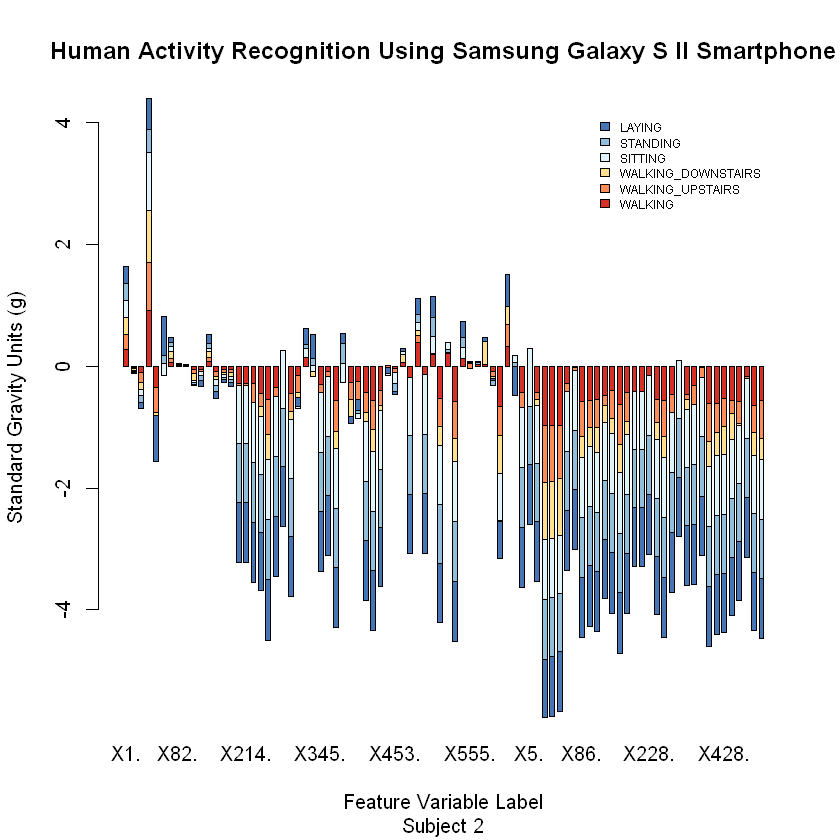

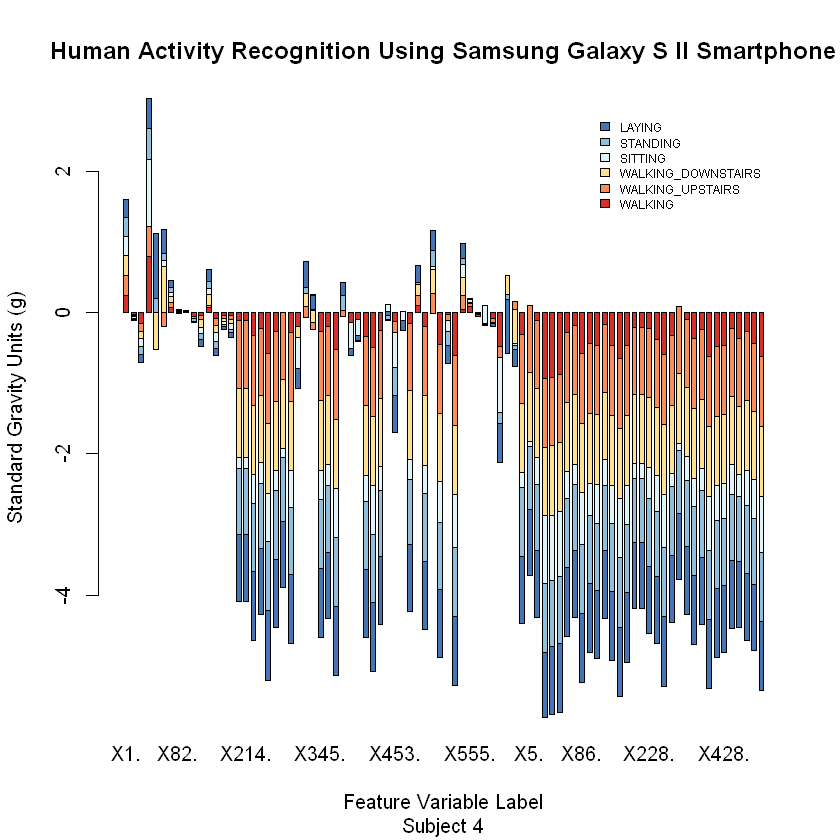

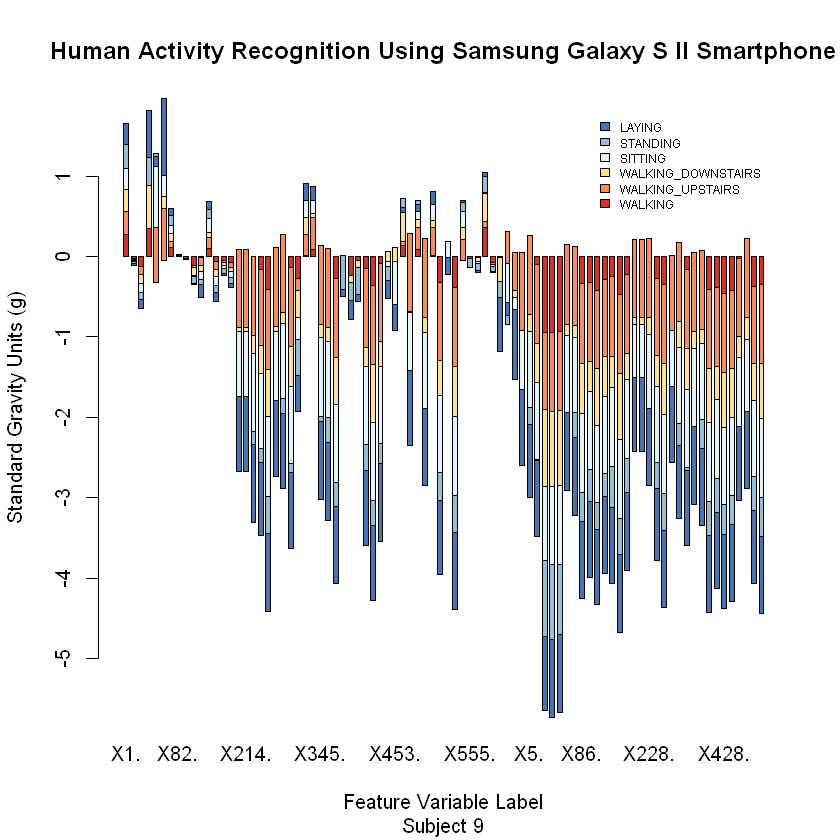

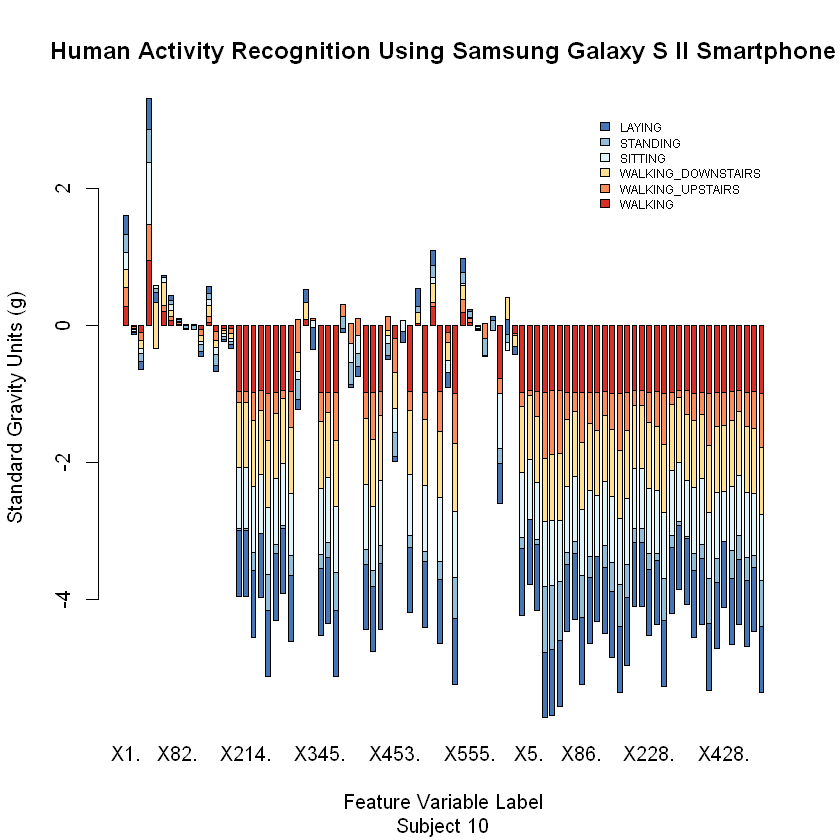

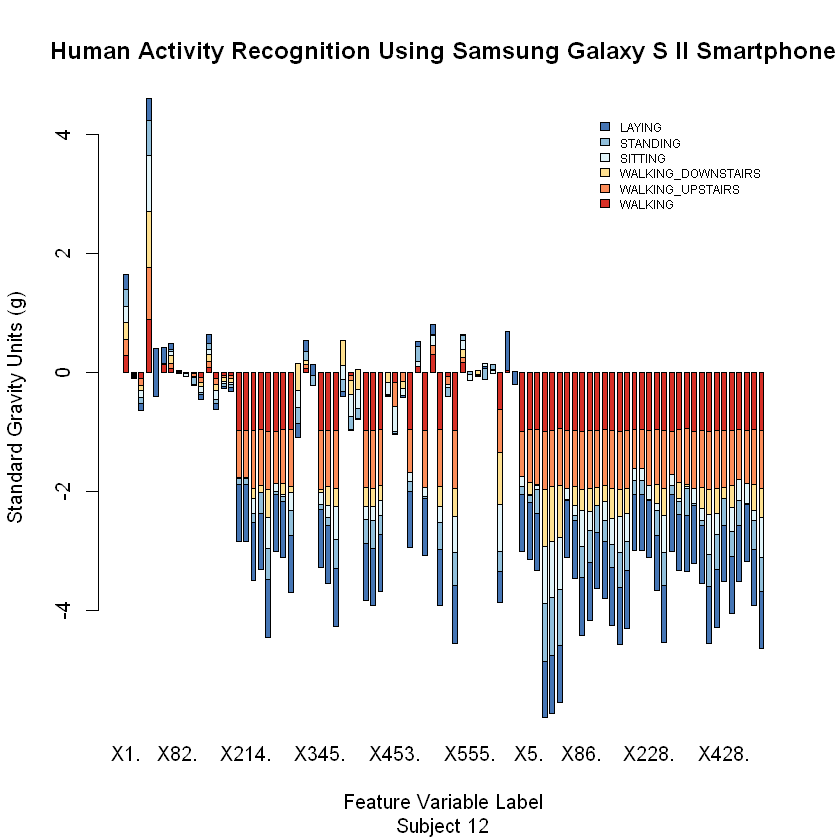

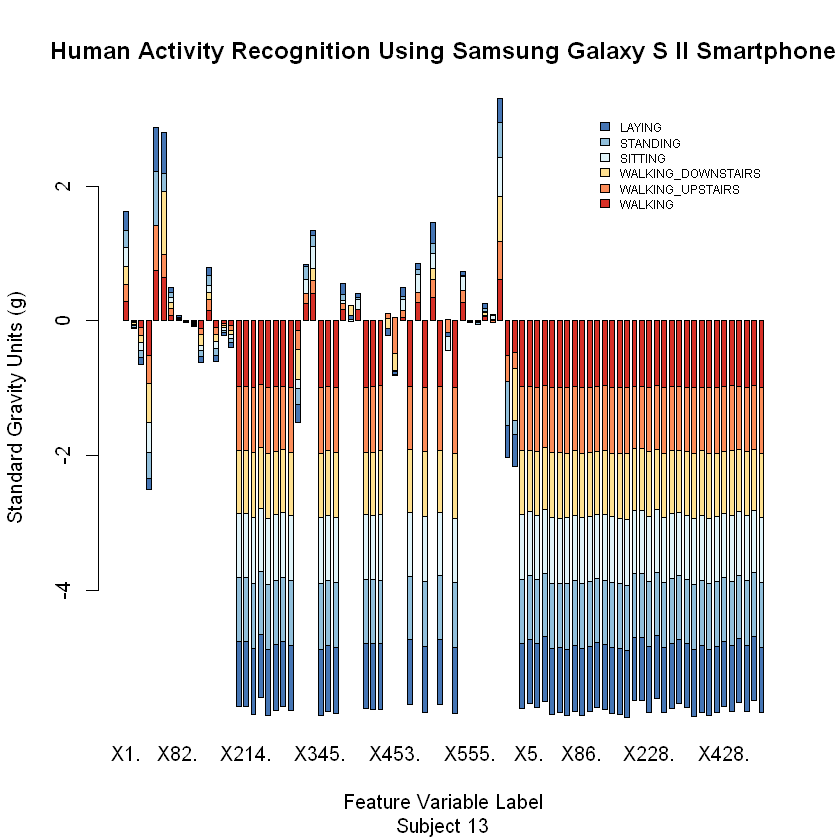

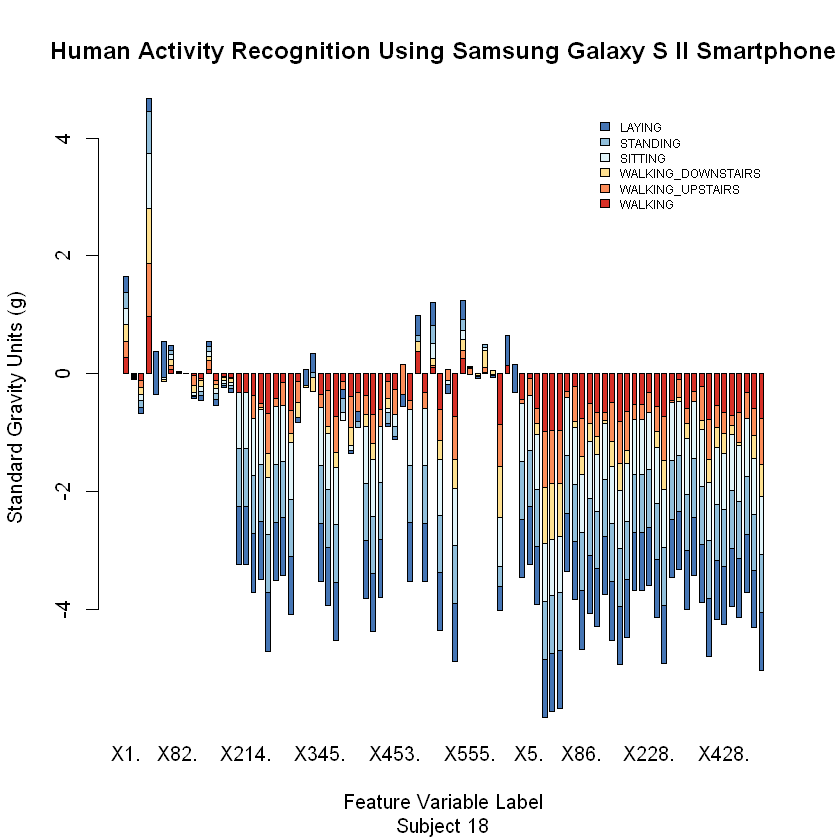

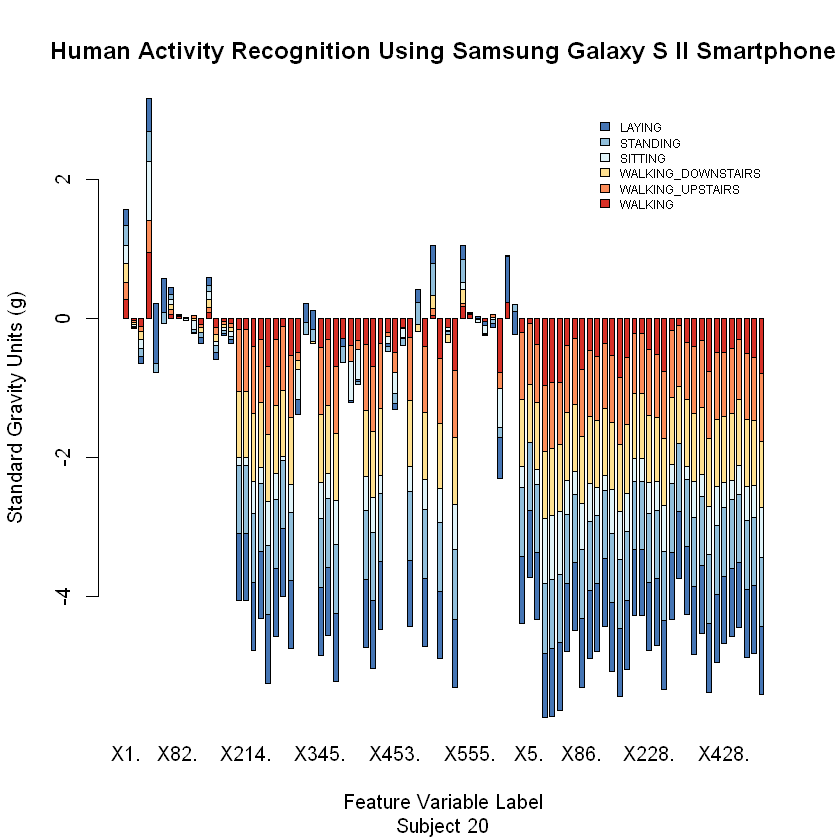

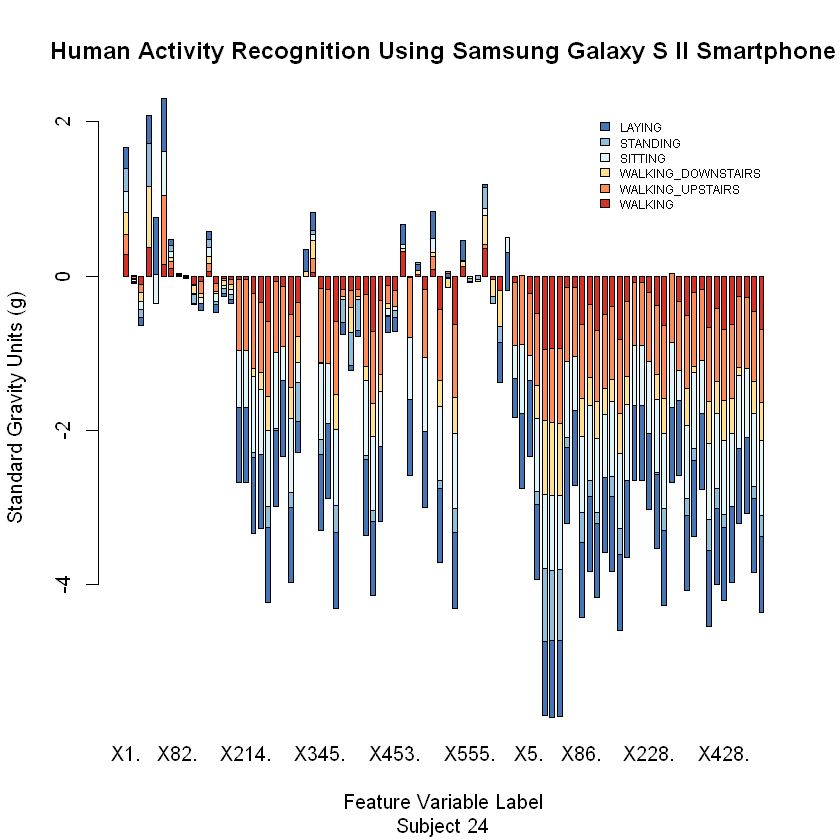

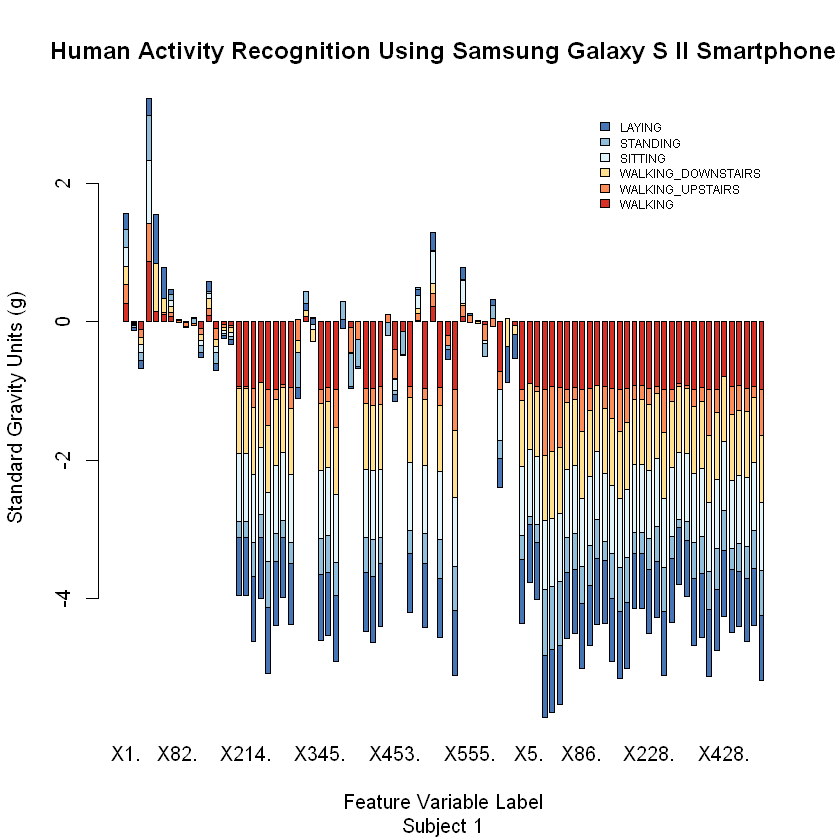

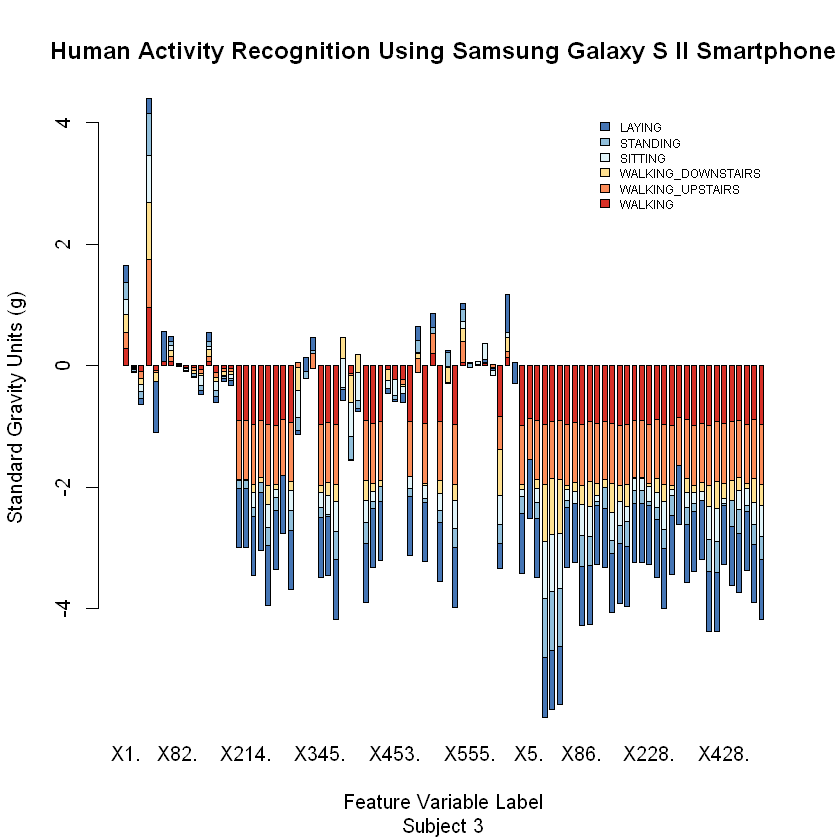

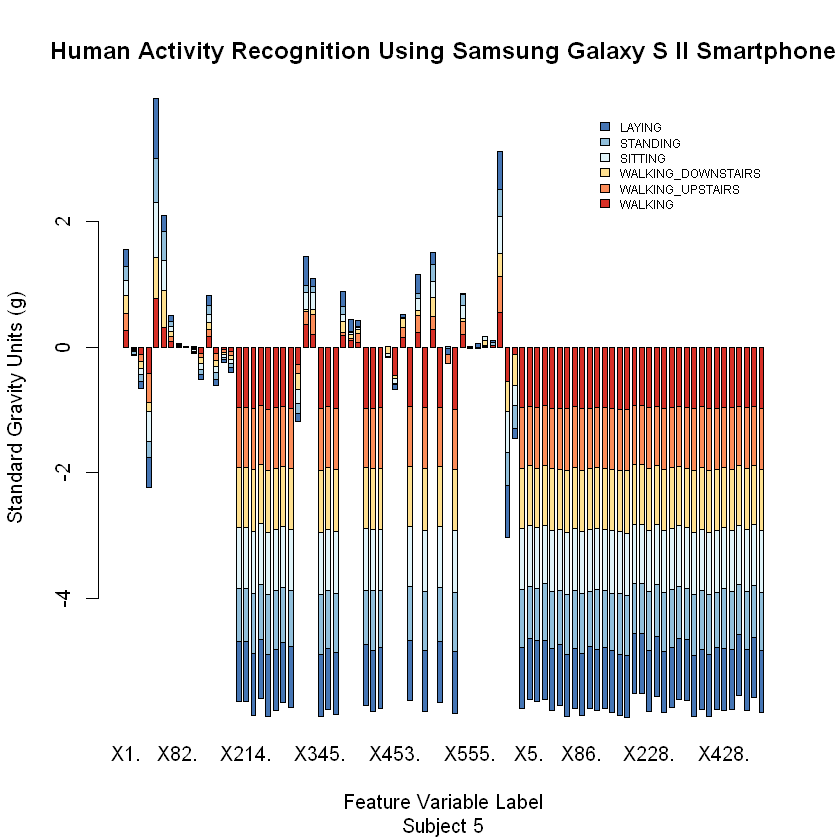

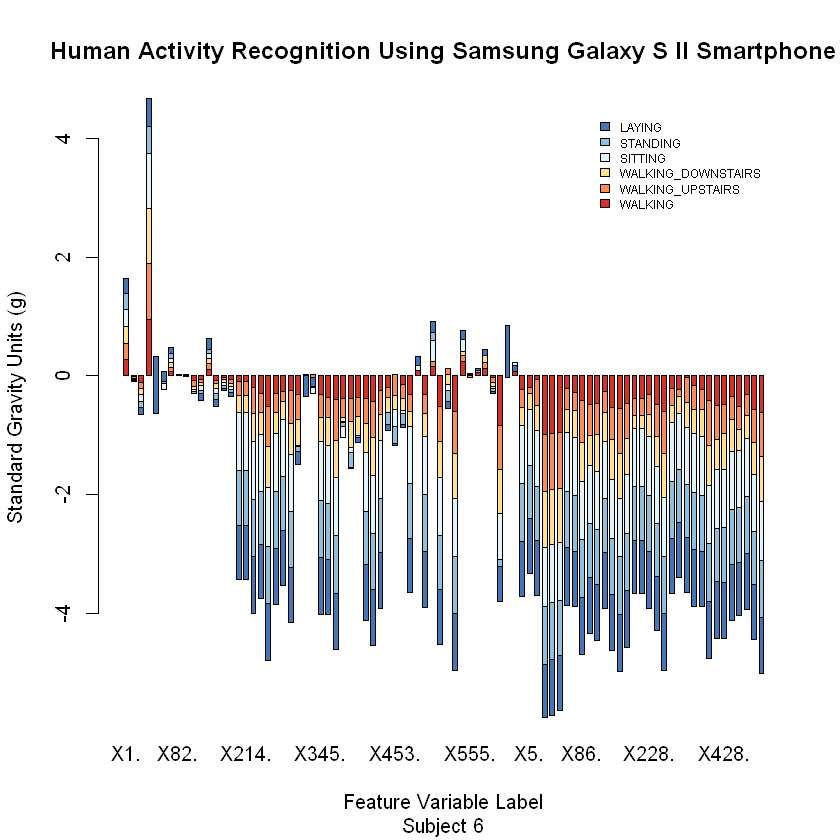

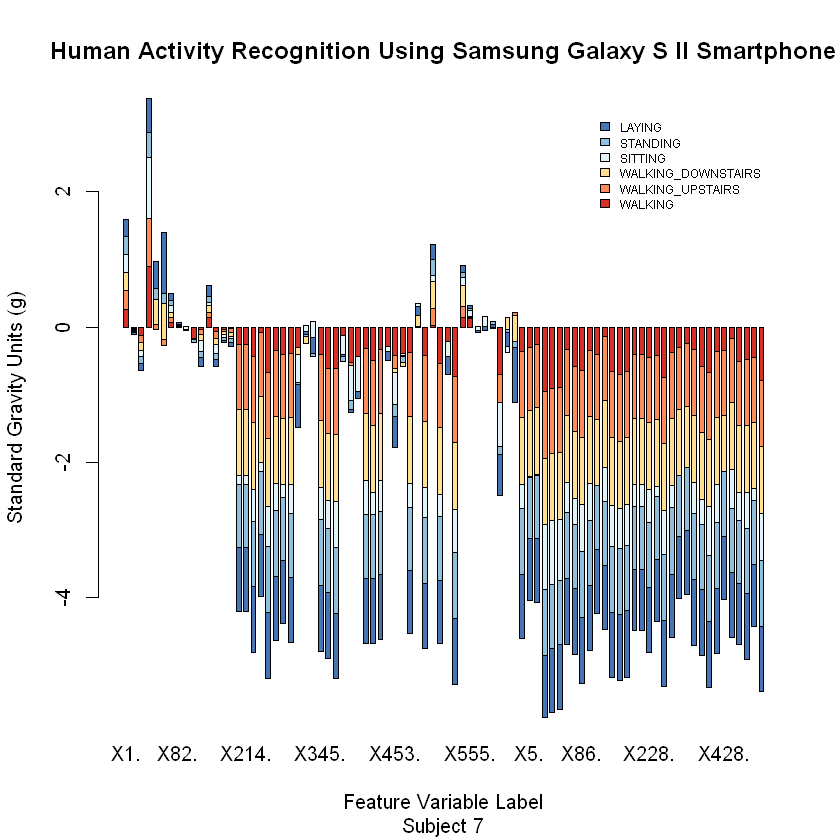

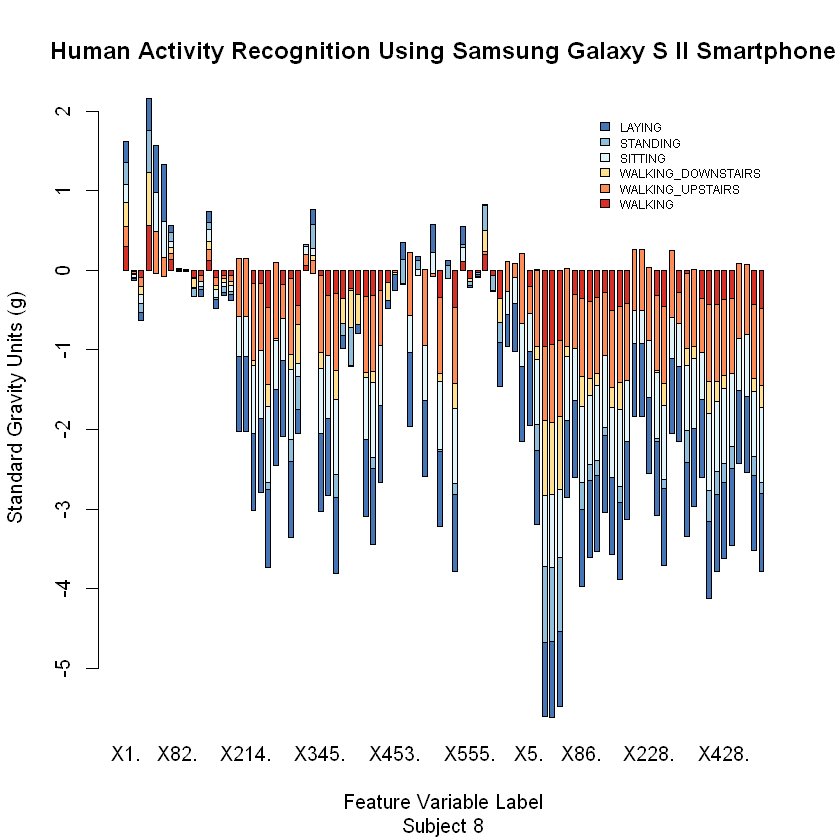

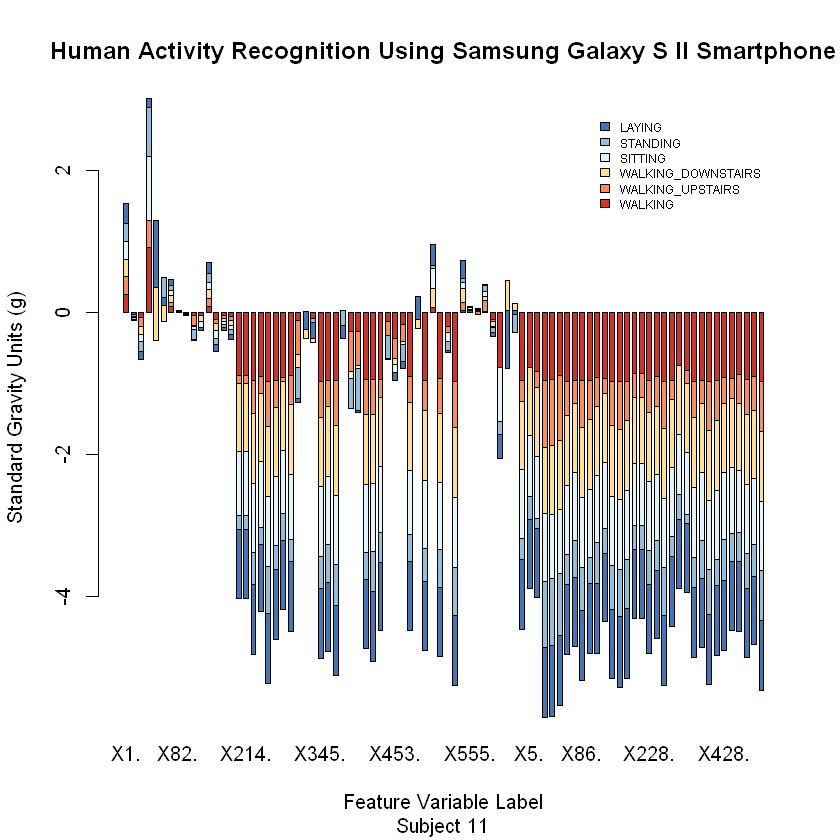

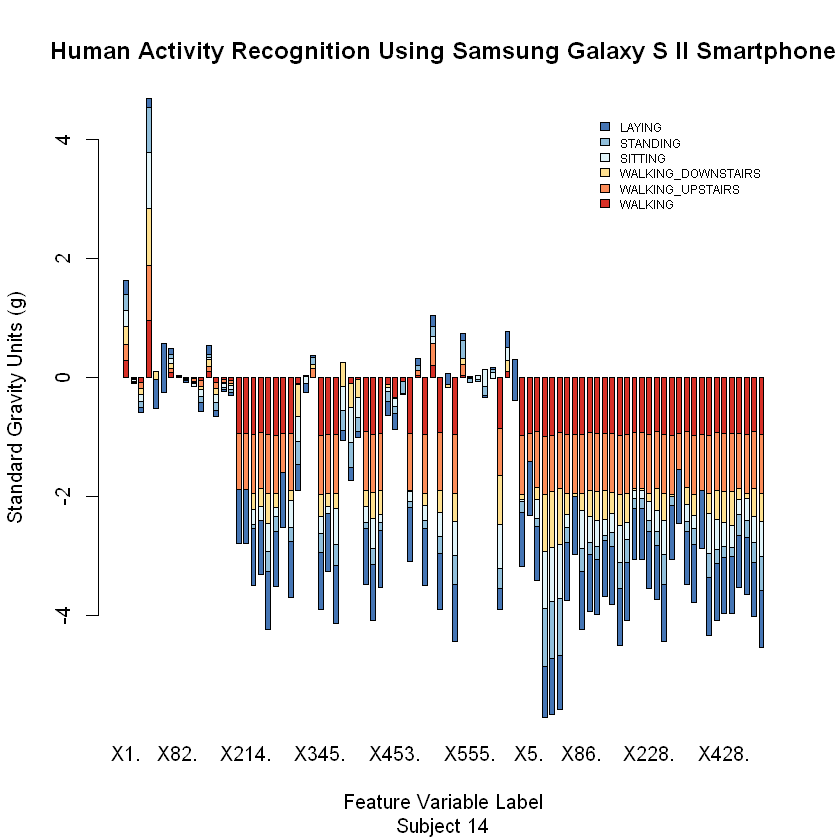

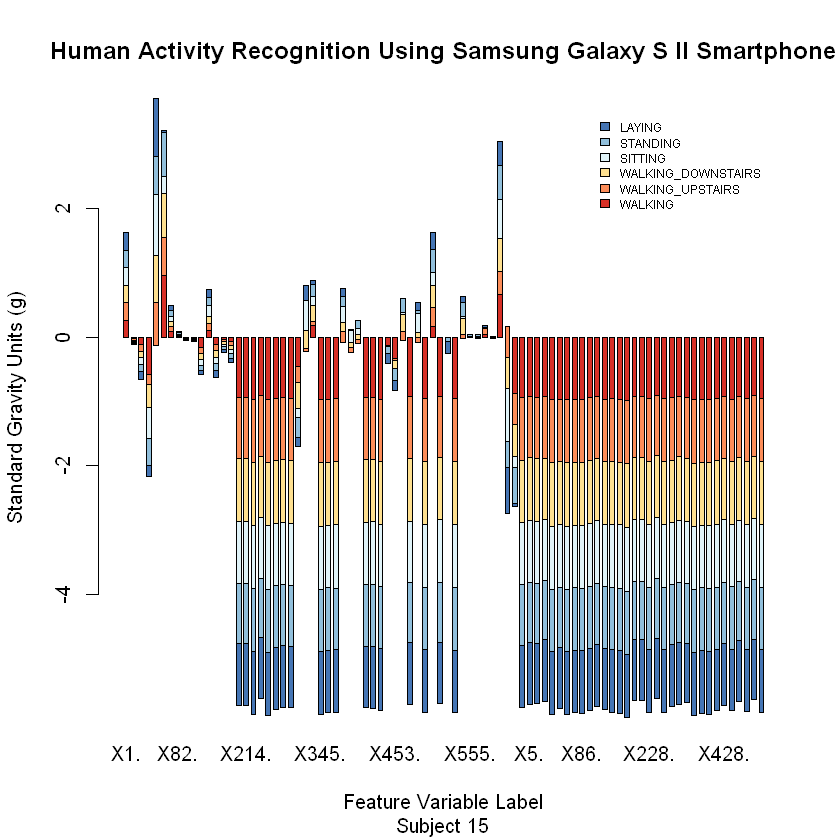

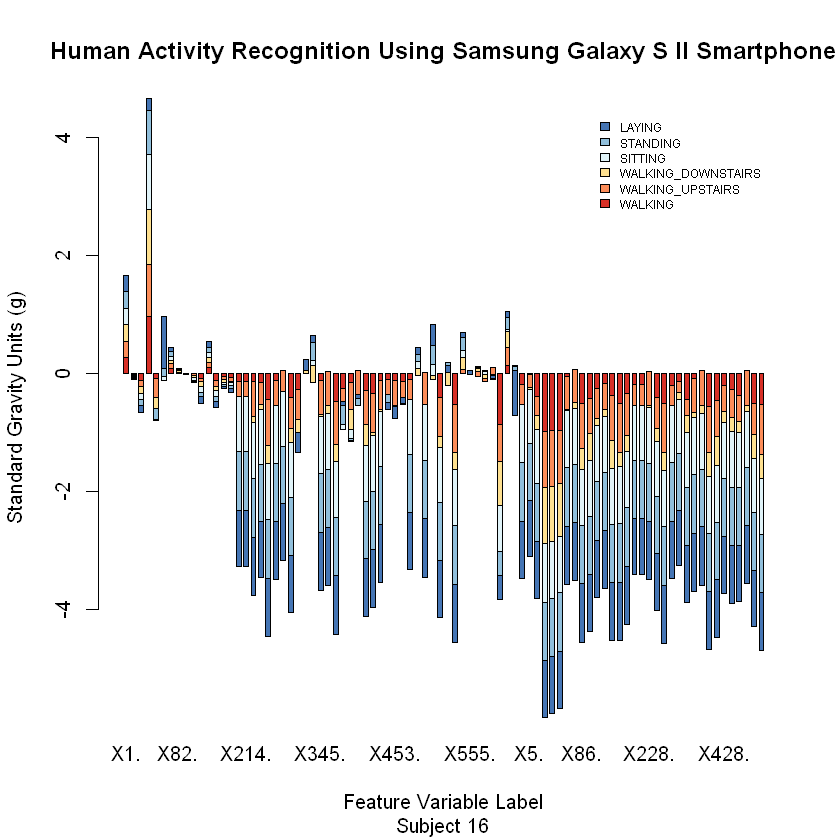

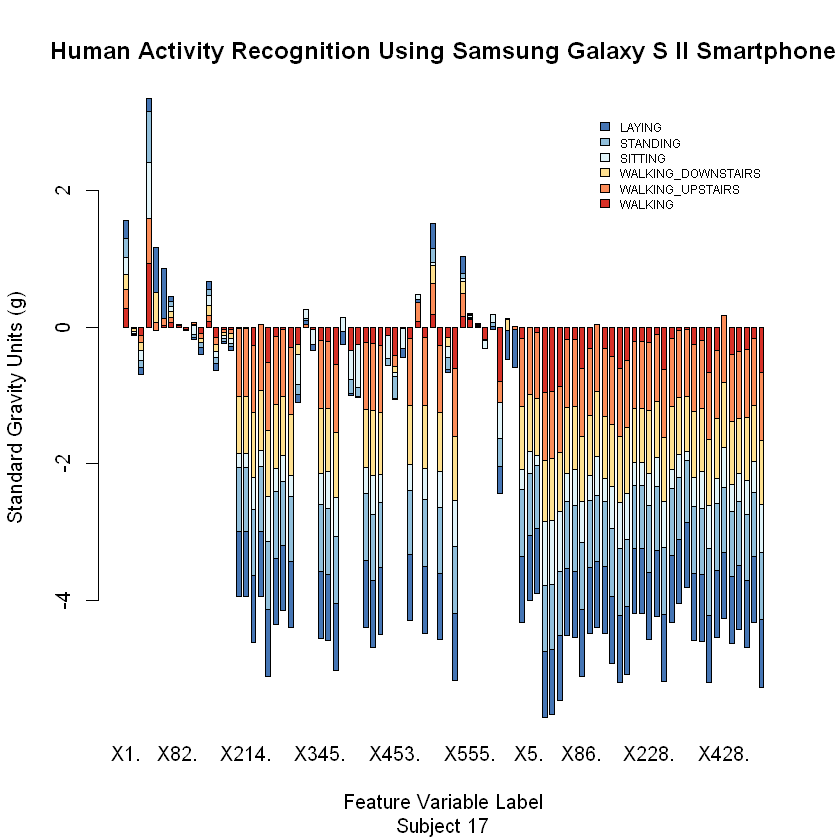

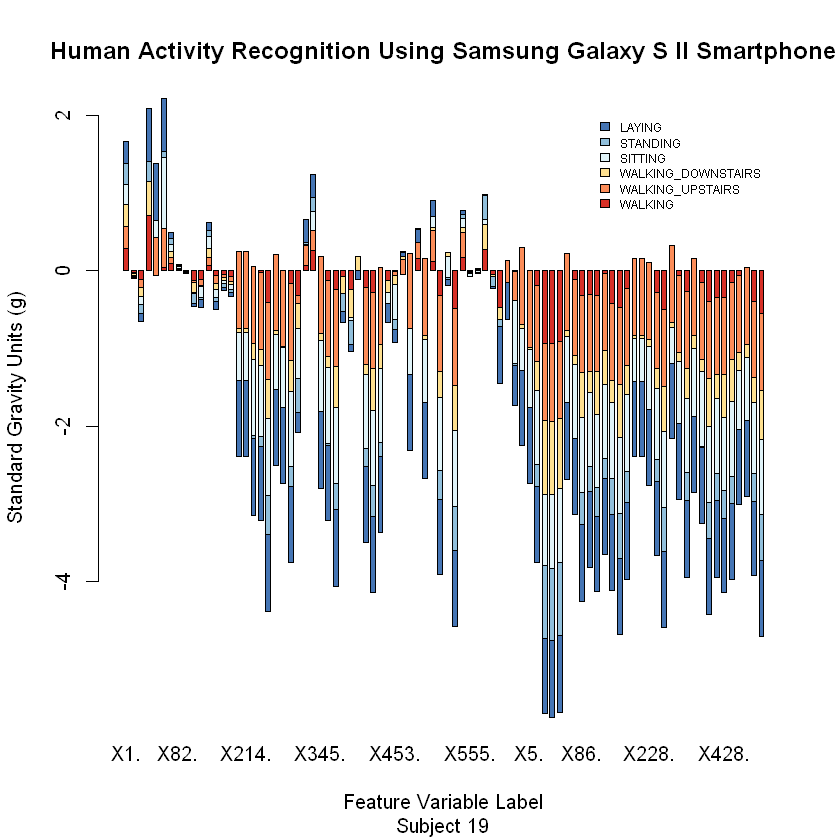

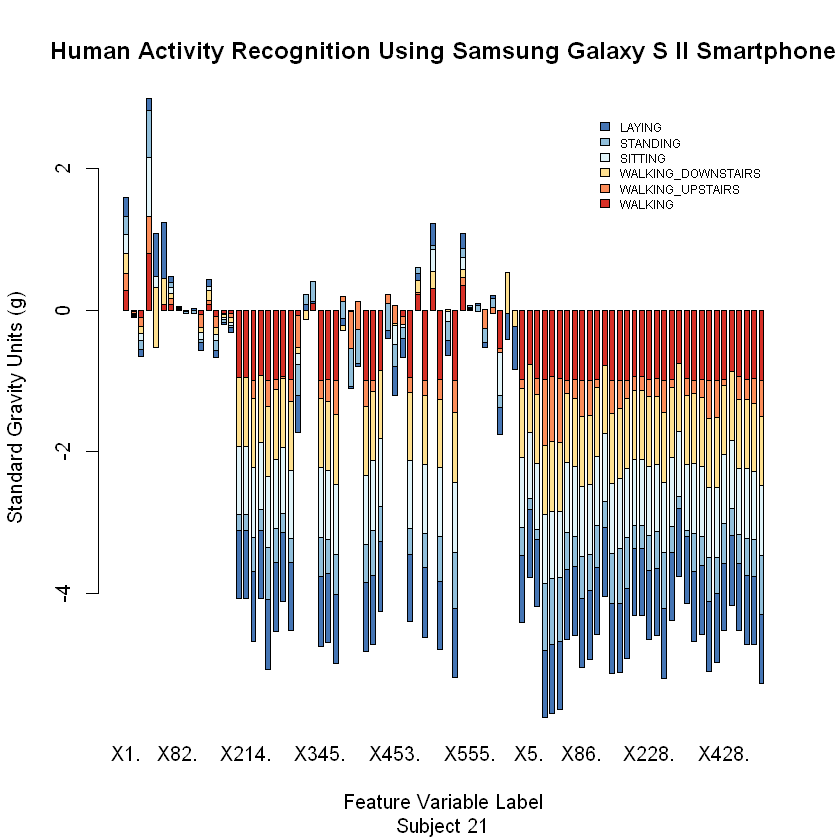

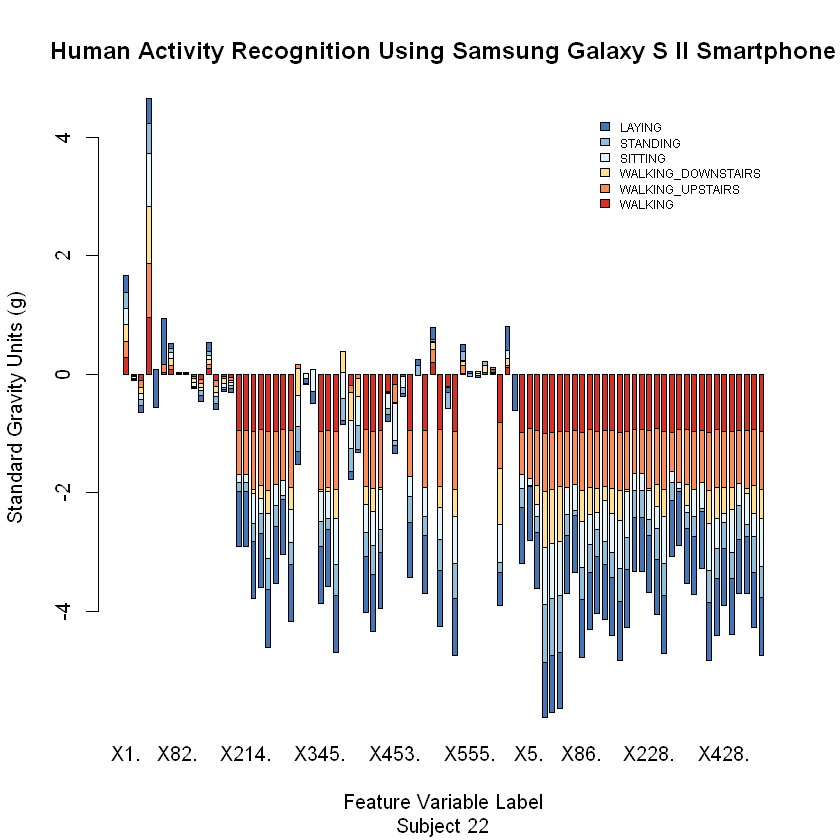

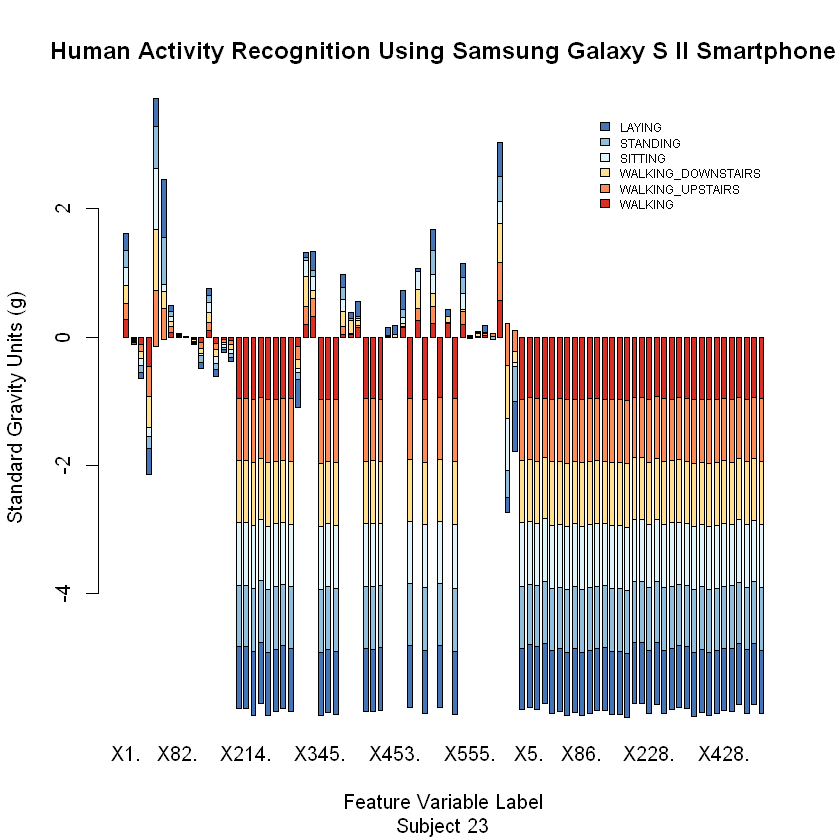

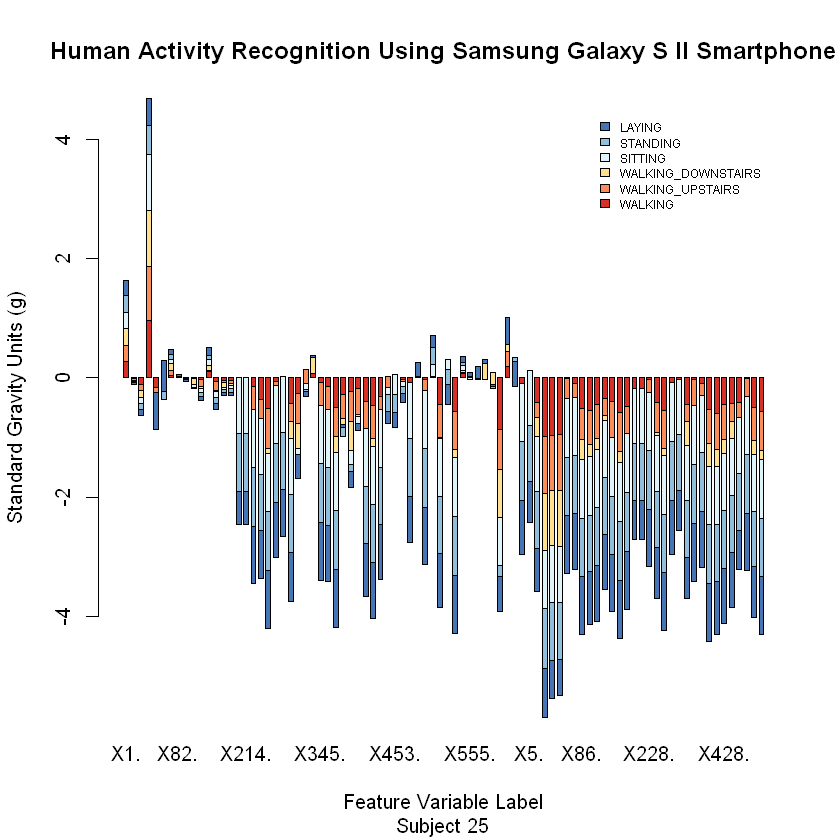

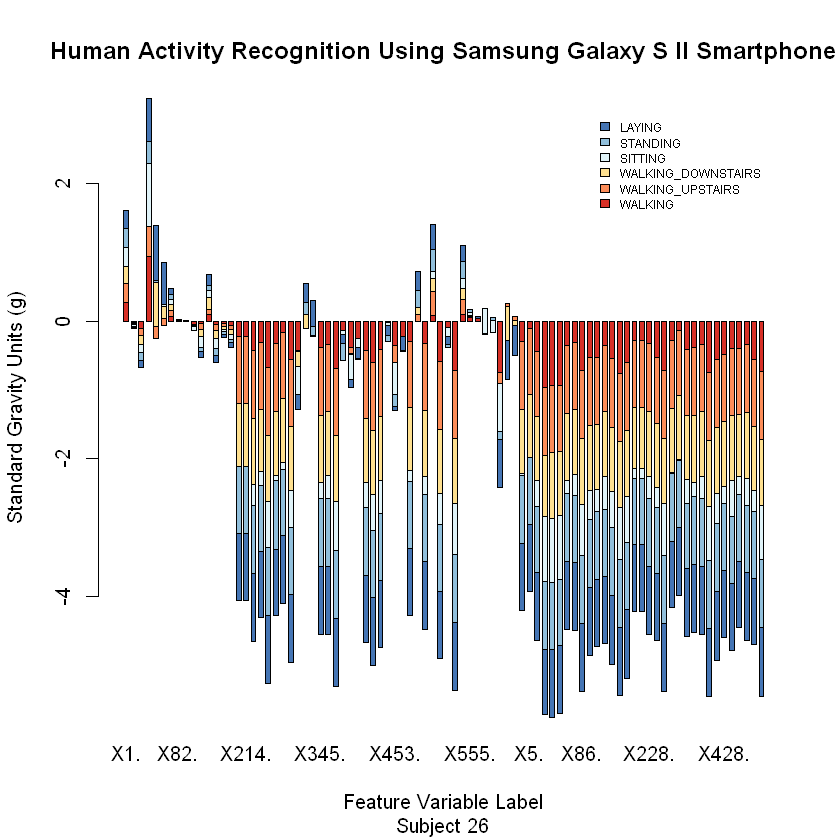

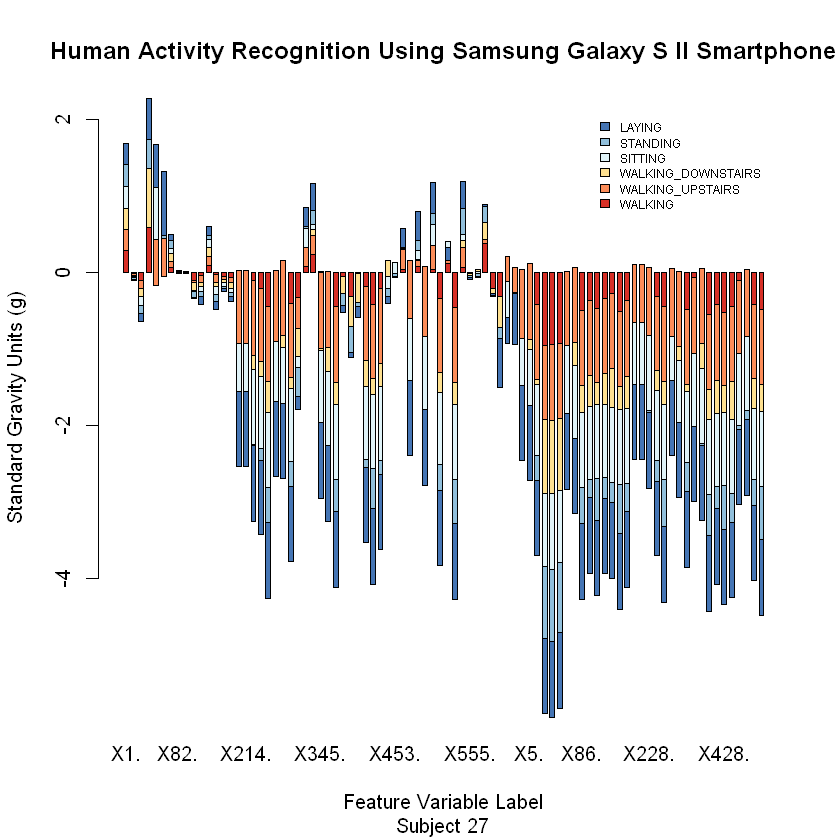

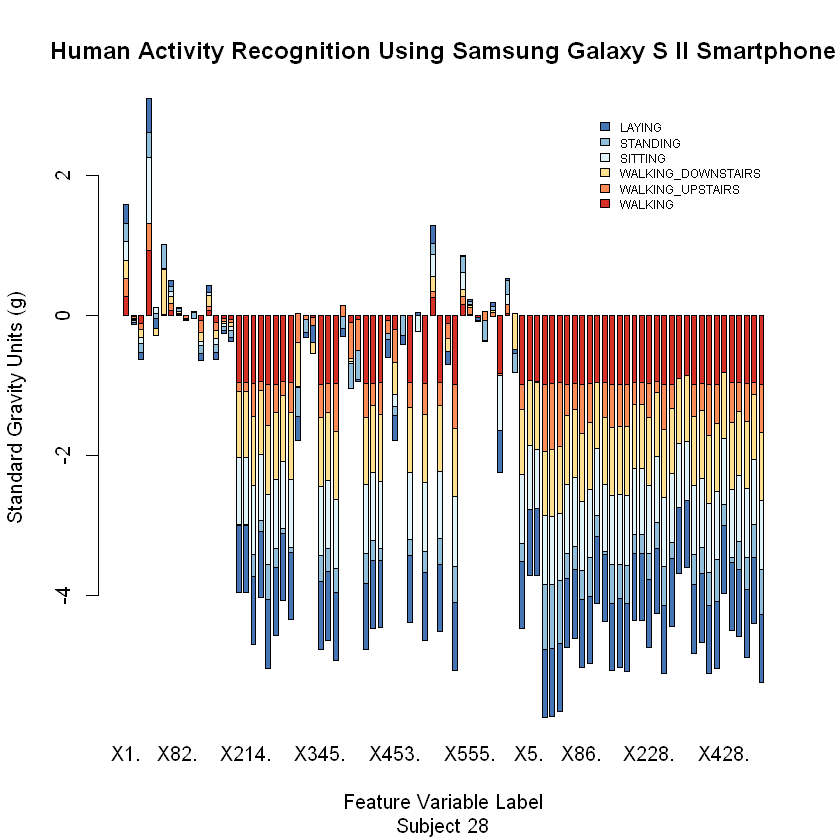

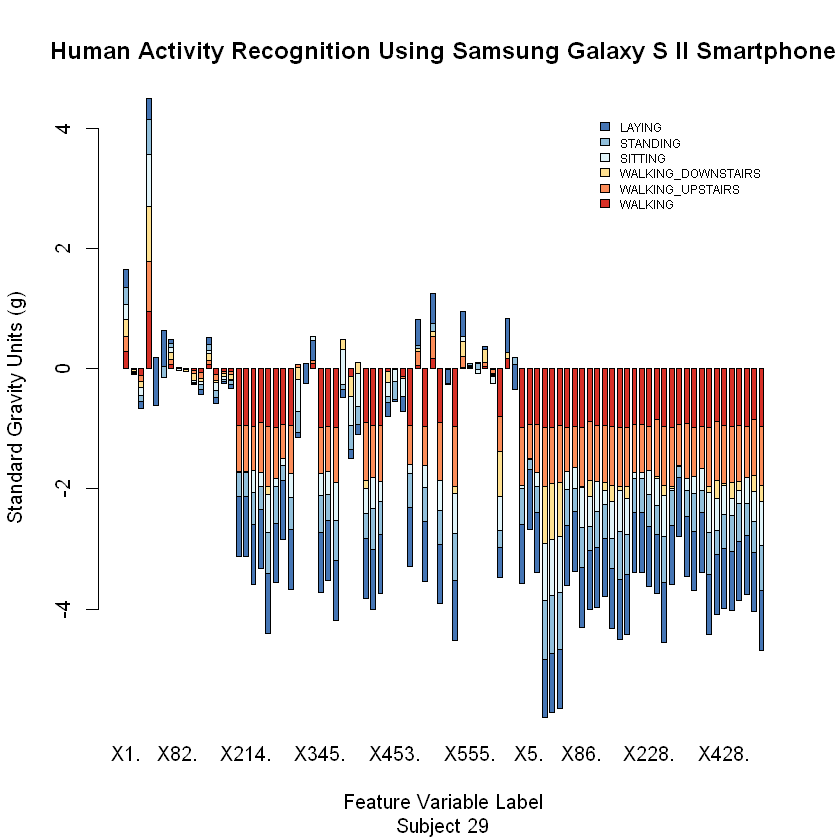

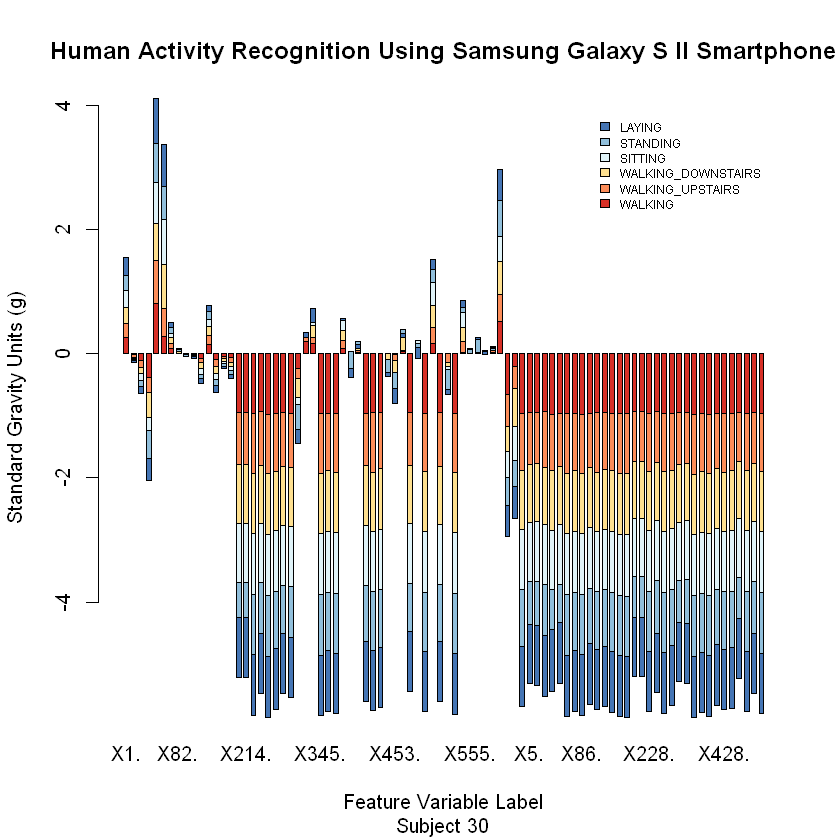

In [50]:
##for each value in the "subjects" vector subset the appropriate rows and 
    ##columns then plot a barplot.
for(subject in subjects ) {
    ##go to dataset
    ##pull out 6 rows and all columns from 3 to the entire length of the data set
    matrix_final_tidy_data <- final_tidy_data[1:6 * j,3:length(final_tidy_data) ]
    ##create a barplot
    barplot(as.matrix(matrix_final_tidy_data), main = "Human Activity Recognition Using Samsung Galaxy S II Smartphone",
            sub = subject,
            xlab = "Feature Variable Label",
            ylab = "Standard Gravity Units (g)",
            legend.text = factors_labels,
            args.legend = list("topright", inset = .0001, bty = "n", cex=0.6),
            names.arg =  str_extract(colnames(matrix_final_tidy_data), "^X[0-9]*\\."),
            col = brewer.pal(n=6,name="RdYlBu"),
            space = 0.5
    )
    ##increment the row counter by 1
    j <- j + 1

}